In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_APCspend = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', engine='python')

In [3]:
df_APCspend.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
df_APCspend.columns = ['PMID/PMCID','Publisher', 'Journal_title', 'Article_title', 'COST']

In [5]:
# convert journal titles to all lowercase
df_APCspend_clean = df_APCspend
df_APCspend_clean['Journal_title'] = df_APCspend_clean[['Journal_title']].apply(lambda x: x.astype(str).str.lower())
df_APCspend_clean.head()

,PMID/PMCID,Publisher,Journal_title,Article_title,COST
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [6]:
# filter function to extract just the digit information, remove $ and £ signs, then convert to float number
df_APCspend_clean_2 = df_APCspend_clean
df_APCspend_clean_2['COST'] = df_APCspend_clean_2['COST'].replace({'\£': '', '\$': ''}, regex=True).astype(float)
df_APCspend_clean_2.head()

,PMID/PMCID,Publisher,Journal_title,Article_title,COST
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,685.88


### Determine the five most common journals and the total articles for each.

In [7]:
# most popular journals (NOT publishers)
df_APCspend_journal = df_APCspend_clean_2[['Publisher', 'Journal_title', 'Article_title']].groupby(['Publisher', 'Journal_title'], as_index=False).count()
df_APCspend_journal = df_APCspend_journal.sort_values(['Article_title'], ascending=False)
df_APCspend_journal.columns = ['Publisher', 'Journal_title', 'Article_count']
df_APCspend_journal.head()

,Publisher,Journal_title,Article_count
822,Public Library of Science,plos one,169
18,ASBMB,journal of biological chemistry,32
419,Elsevier,neuroimage,27
823,Public Library of Science,plos pathogens,22
821,Public Library of Science,plos neglected tropical diseases,20


In [8]:
# saving top 5 journals by count
top5_journals = df_APCspend_journal['Journal_title'][0:5]
top5_journals

822                            plos one
18      journal of biological chemistry
419                          neuroimage
823                      plos pathogens
821    plos neglected tropical diseases
Name: Journal_title, dtype: object

In [9]:
#need to clean the data of NAs?

In [10]:
df_top5_journals = df_APCspend_clean_2[df_APCspend_clean_2['Journal_title'].apply(lambda x: x in top5_journals.values)]
df_top5_journals

,PMID/PMCID,Publisher,Journal_title,Article_title,COST
16,22610094,AMBSB,journal of biological chemistry,Annexin-1 interaction with FPR2/ALX,265.67
60,PMC3576085,American Soc for Biochemistry and Molecular Bi...,journal of biological chemistry,Understanding how noncatalytic carbohydrate bi...,1100.00
61,23239883 PMC3561570,American Society for Biochemistry and Molecula...,journal of biological chemistry,Molecular architecture and functional analysis...,2259.64
64,PMCID: PMC3642348,American Society for Biochemistry and Molecula...,journal of biological chemistry,Human and viral golgi anti-apoptotic protein (...,1019.71
65,PMID: 22992744 PMC3493908,American Society for Biochemistry and Molecula...,journal of biological chemistry,Dynamic exchange of myosin VI on endocytic str...,1119.61
66,PMCID: PMC3531748,American Society for Biochemistry and Molecula...,journal of biological chemistry,Uncoupling proteostasis and development in vit...,1131.01
67,PMCID: PMC3436574\n,American Society for Biochemistry and Molecula...,journal of biological chemistry,Structural Requirements for Recognition of Maj...,1137.51
68,PMID: 23223336 PMC3543027,American Society for Biochemistry and Molecula...,journal of biological chemistry,Visualization of structural changes accompanyi...,1152.72
69,PMCID: PMC3795252,American Society for Biochemistry and Molecula...,journal of biological chemistry,SLP-76 sterile alpha motif (SAM) and individua...,1160.09
70,PMCID: PMC3724652,American Society for Biochemistry and Molecula...,journal of biological chemistry,?-Amino-3-hydroxy-5-methyl-4-isoxazole propion...,1166.85


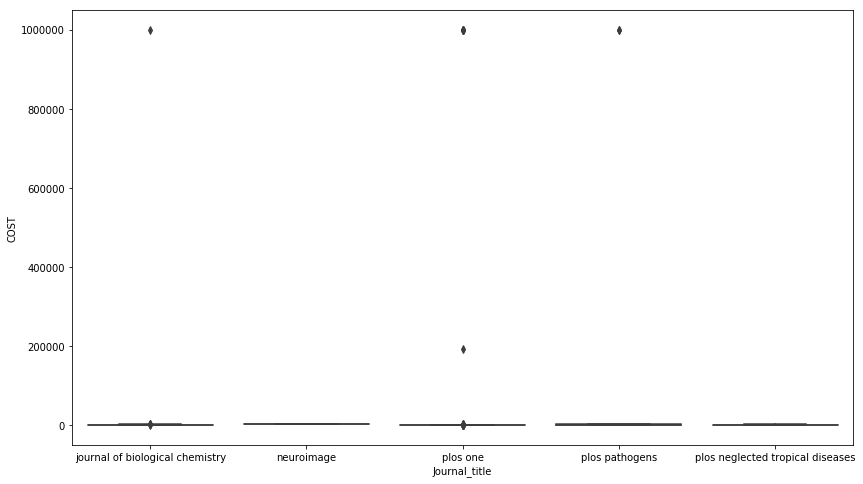

In [13]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Journal_title', y='COST',data=df_top5_journals)
plt.show()

In [40]:
data_mean, data_std = np.mean(df_top5_journals['COST']), np.std(df_top5_journals['COST'])
remove_outliers = data_std * 3

In [41]:
lower, upper = data_mean - remove_outliers, data_mean + remove_outliers

In [44]:
df_top5_journals = df_top5_journals[df_top5_journals['COST'].apply(lambda x: x < upper)]

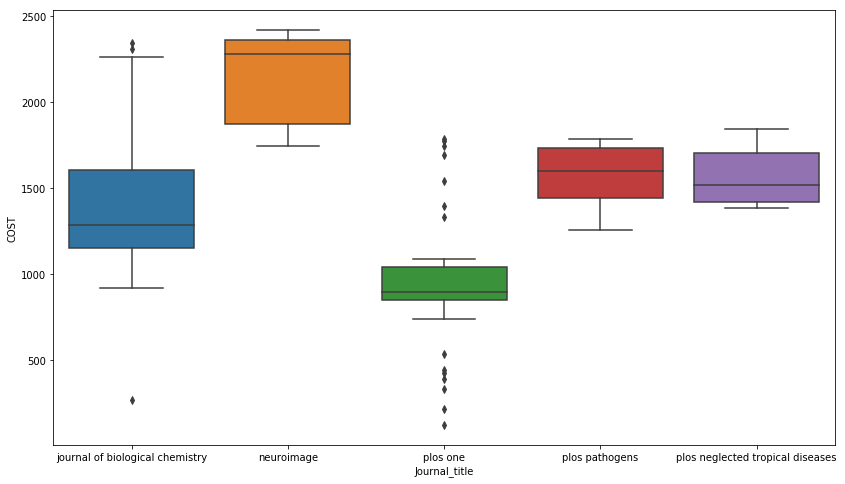

In [45]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Journal_title', y='COST',data=df_top5_journals)
plt.show()

In [46]:
df_top5_journals[['Journal_title', 'COST']].groupby(['Journal_title']).agg([np.mean, np.median, np.std])

COST                      
                                         mean    median         std
Journal_title                                                      
journal of biological chemistry   1402.461373  1287.750  386.556480
neuroimage                        2148.019130  2280.140  259.830735
plos neglected tropical diseases  1563.519000  1516.115  156.521088
plos one                           934.655824   896.975  201.847589
plos pathogens                    1572.866818  1600.250  161.780891